In [1]:
import pandas as pd 
import numpy as np
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as p
import plotly.io as pio
import os

os.chdir("..")
from utils import null_checker, countplot_annot_hue
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
sns.set(style='darkgrid', palette='muted')

In [3]:
os.chdir("data")
df = pd.read_csv("Automobile_data.csv", na_values="?")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
null_checker(df)

,null (sum),null (%)
normalized-losses,41,20.00
price,4,1.95
stroke,4,1.95
bore,4,1.95
peak-rpm,2,0.98
num-of-doors,2,0.98
horsepower,2,0.98
engine-type,0,0.00
highway-mpg,0,0.00
city-mpg,0,0.00


In [6]:
# Drop row with missing value of price
df = df[~df["price"].isna()]
null_checker(df)

,null (sum),null (%)
normalized-losses,37,18.41
stroke,4,1.99
bore,4,1.99
peak-rpm,2,1.00
num-of-doors,2,1.00
horsepower,2,1.00
symboling,0,0.00
engine-type,0,0.00
highway-mpg,0,0.00
city-mpg,0,0.00


In [7]:
df.drop(columns="normalized-losses", inplace=True)

# EDA

In [8]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel-type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       199 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [11]:
int_cols = list(df.select_dtypes("int64"))
float_cols = list(df.select_dtypes("float64"))
obj_cols = list(df.select_dtypes("object"))

In [12]:
float_cols

['wheel-base',
 'length',
 'width',
 'height',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'price']

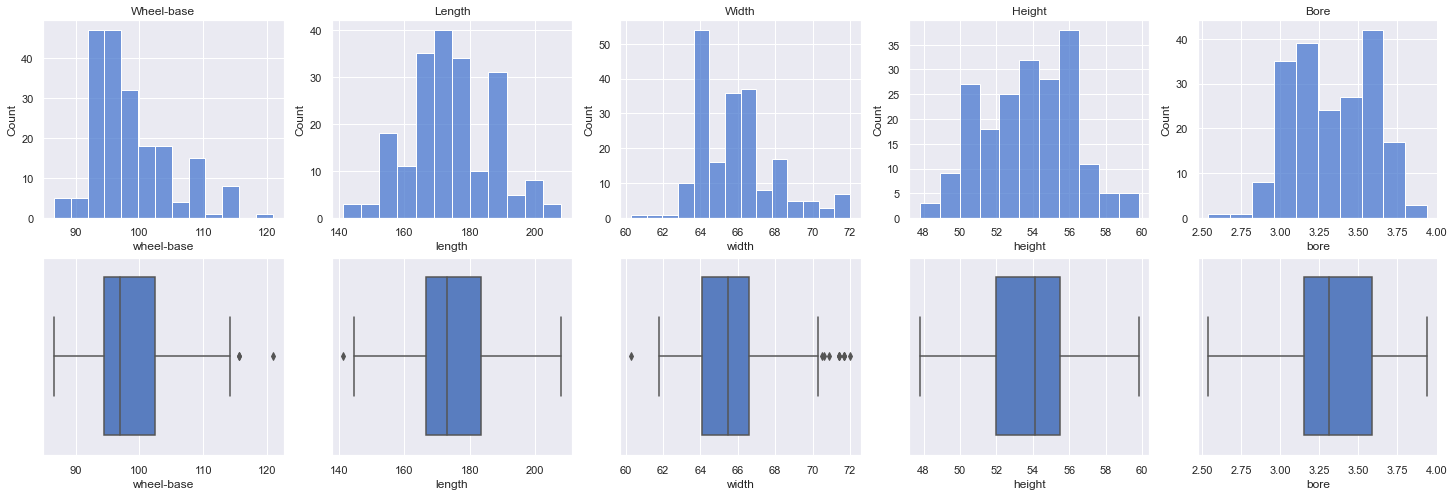

In [13]:
plt.figure(figsize=(25,8))
for i, col in enumerate(float_cols[:5]):
    plt.subplot(2,5,i+1)
    sns.histplot(data=df, x=col)
    plt.title(col.capitalize())
for i, col in enumerate(float_cols[:5]):
    plt.subplot(2,5,i+6)
    sns.boxplot(data=df, x=col)

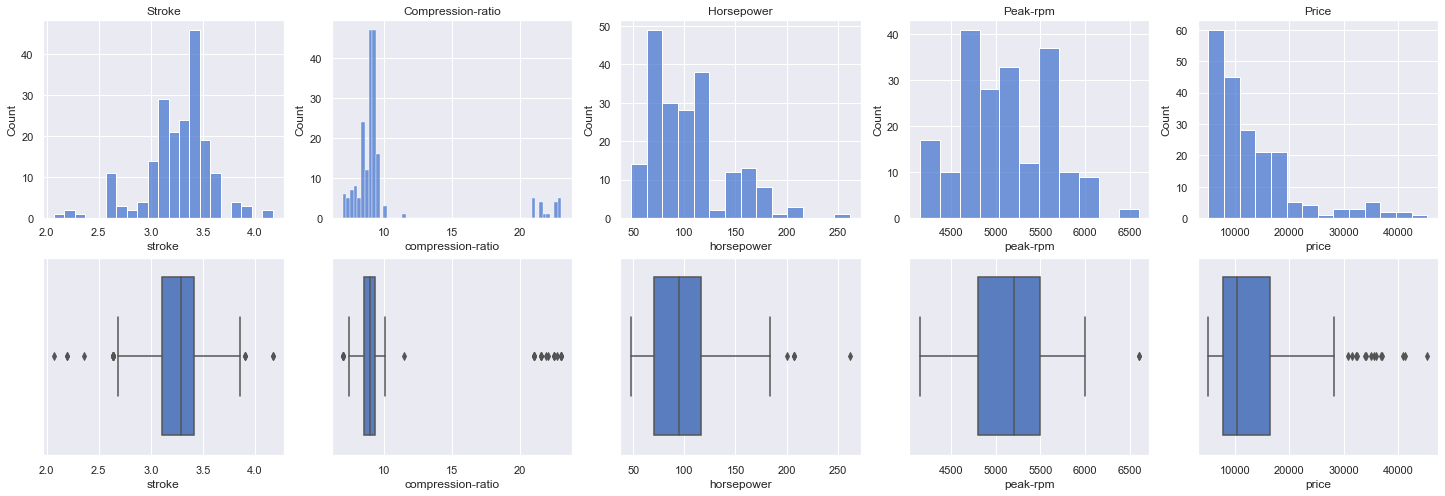

In [14]:
plt.figure(figsize=(25,8))
for i, col in enumerate(float_cols[5:]):
    plt.subplot(2,5,i+1)
    sns.histplot(data=df, x=col)
    plt.title(col.capitalize())
for i, col in enumerate(float_cols[5:]):
    plt.subplot(2,5,i+6)
    sns.boxplot(data=df, x=col)

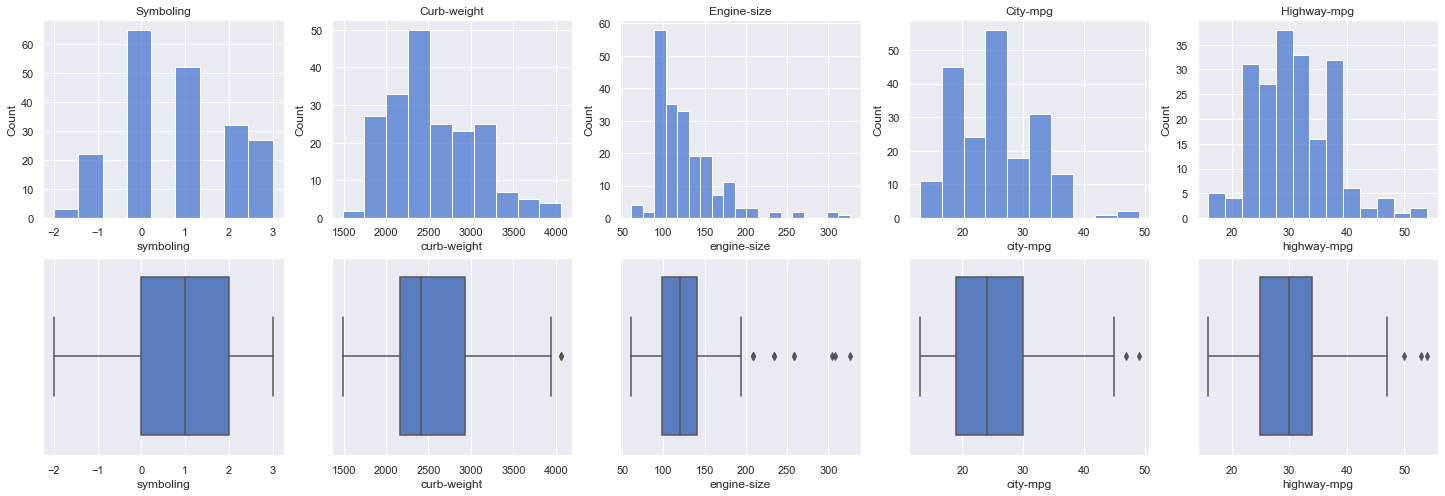

In [15]:
plt.figure(figsize=(25,8))
for i, col in enumerate(int_cols):
    plt.subplot(2,5,i+1)
    sns.histplot(data=df, x=col)
    plt.title(col.capitalize())
for i, col in enumerate(int_cols):
    plt.subplot(2,5,i+6)
    sns.boxplot(data=df, x=col)

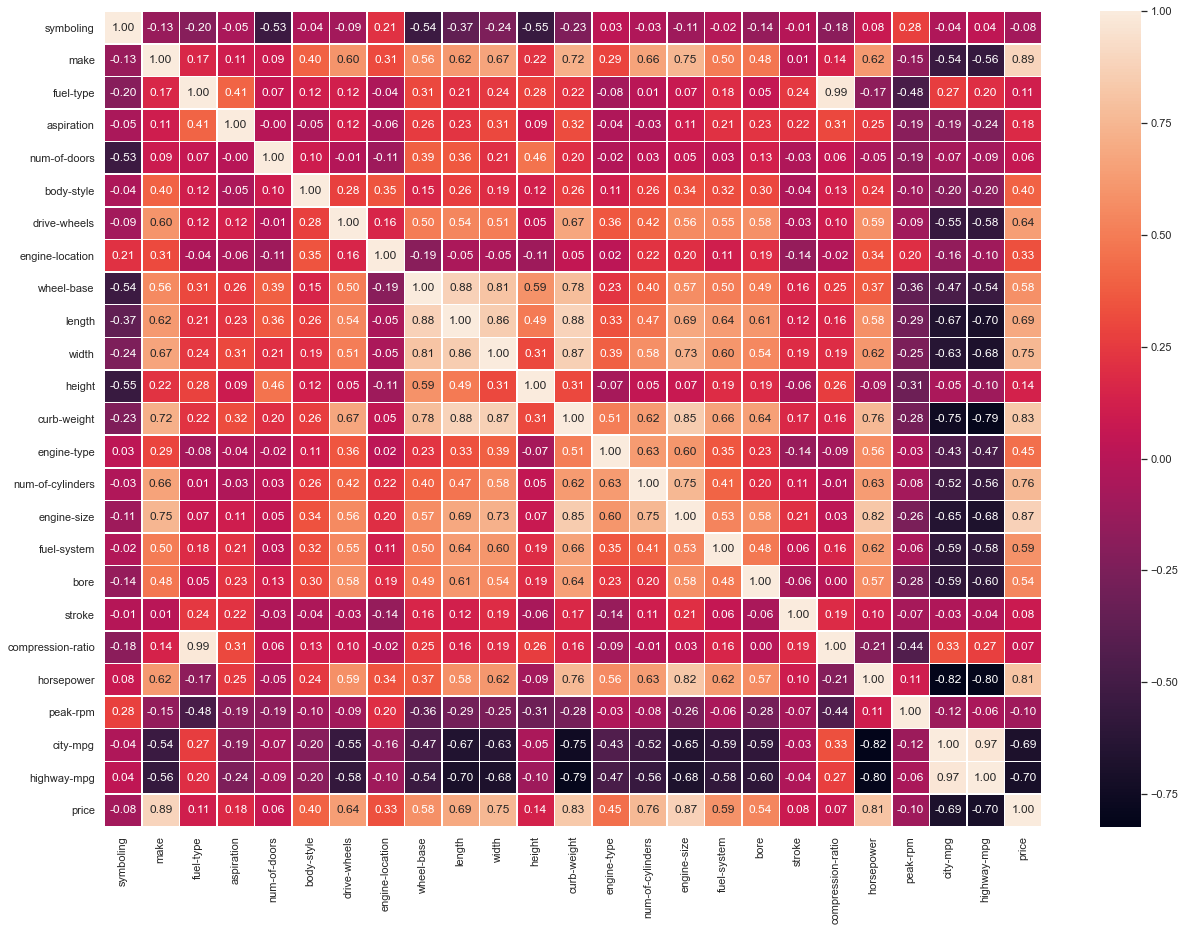

In [16]:
t_encoder = ce.TargetEncoder()
df_temp = t_encoder.fit_transform(df.drop(columns=["price"]), df["price"])
df_temp = pd.concat([df_temp, df["price"]], axis=1)

plt.figure(figsize=(14*1.5, 10*1.5))
sns.heatmap(df_temp.corr(), annot=True, linewidths=0.5, fmt=".2f")
plt.show()

In [17]:
obj_cols

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

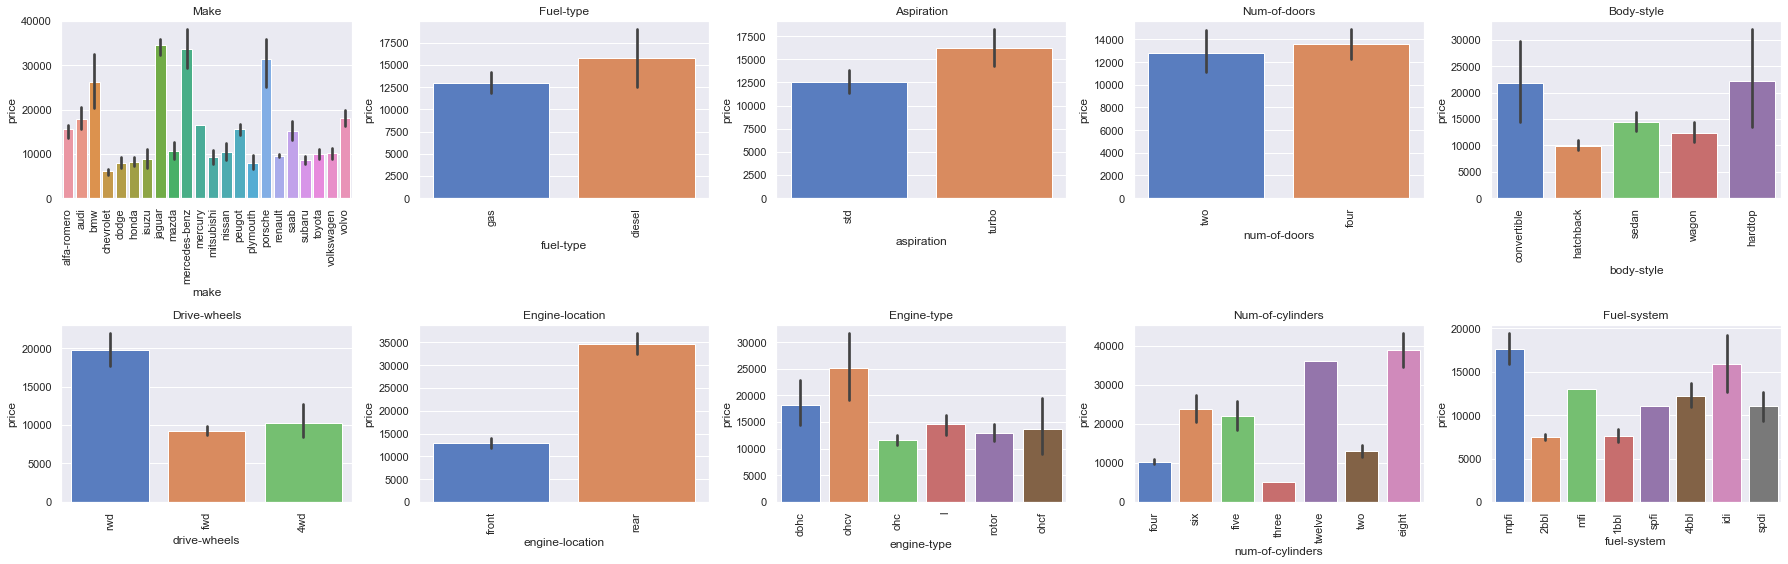

In [18]:
plt.figure(figsize=(25,8))
for i, col in enumerate(obj_cols):
    plt.subplot(2,5,i+1)
    sns.barplot(data=df, x=col, y="price")
    plt.title(col.capitalize())
    plt.xticks(rotation=90)
plt.tight_layout()

# Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
skew_limit = 0.85 # define a limit above which we will log transform
skew_vals = df[float_cols+int_cols].drop(columns="price").skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
compression-ratio,2.584462
engine-size,1.979144
horsepower,1.141584
wheel-base,1.031261
width,0.875029


In [21]:
for col in skew_cols.index:
    X_train[col] = np.log(X_train[col])
    X_test[col] = np.log(X_test[col])

In [22]:
miss_cols = list(null_checker(X_train).head(5).index)
miss_cols

['stroke', 'bore', 'peak-rpm', 'horsepower', 'num-of-doors']

In [23]:
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(strategy="mean")
mode_imp = SimpleImputer(strategy="most_frequent")

for col in miss_cols:
    if X_train[col].dtype=="object":
        X_train[col] = mode_imp.fit_transform(X_train[[col]])
        X_test[col] = mode_imp.transform(X_test[[col]])
    else:
        X_train[col] = mean_imp.fit_transform(X_train[[col]])
        X_test[col] = mean_imp.transform(X_test[[col]])

In [24]:
# Categorical encoding
import category_encoders as ce
oh_encoder = ce.OneHotEncoder(cols=obj_cols,
                              use_cat_names=True)
oh_encoder.fit(X_train)

# Encoding train set
X_train = oh_encoder.transform(X_train)
# Encoding test set
X_test = oh_encoder.transform(X_test)

In [25]:
# Scaling
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_sc_pf = poly.fit_transform(X_train_sc)
X_test_sc_pf = poly.fit_transform(X_test_sc)

# Modeling

In [27]:
from sklearn import metrics

def evaluate_model(models, X_train, X_test, y_train, y_test):

    summary = {
        "Model": [],
        "Train R2": [],
        "Test R2": [],
        "Train RMSE": [],
        "Test RMSE": [],
    }

    for label, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        summary["Model"].append(label)

        summary["Train R2"].append(metrics.r2_score(y_train, y_train_pred))
        summary["Train RMSE"].append(
            np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
        )

        summary["Test R2"].append(metrics.r2_score(y_test, y_test_pred))
        summary["Test RMSE"].append(
            np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
        )

    summary = pd.DataFrame(summary)
    summary.set_index("Model", inplace=True)

    return round(summary.sort_values(by="Test RMSE"), 4)


In [29]:
lr = LinearRegression()
evaluate_model({'Linear': lr}, X_train, X_test, y_train, y_test)

,Train R2,Test R2,Train RMSE,Test RMSE
Model,,,,
Linear,0.9707,0.9071,1162.1067,3166.4252


In [37]:
lasso = Lasso(max_iter=9999)
ridge = Ridge(max_iter=9999)

models = {'Lasso': lasso,
          'Ridge': ridge}

evaluate_model(models, X_train_sc_pf, X_test_sc_pf, y_train, y_test)

,Train R2,Test R2,Train RMSE,Test RMSE
Model,,,,
Ridge,0.9900,0.9505,679.2758,2311.8932
Lasso,0.9938,0.9234,534.2514,2874.9289


In [47]:
import optuna
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_sc_pf = poly.fit_transform(X_train_sc)
X_test_sc_pf = poly.fit_transform(X_test_sc)

def objective(trial):

    alpha = trial.suggest_uniform('alpha', 0.001, 10)
    max_iter = 9999

    model = Lasso(alpha=alpha, max_iter=max_iter)
    model.fit(X_train_sc_pf, y_train)

    return metrics.r2_score(y_test, model.predict(X_test_sc_pf))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

020-11-04 21:22:47,495] Trial 93 finished with value: 0.947712541871584 and parameters: {'alpha': 4.015083998317813}. Best is trial 26 with value: 0.9479409410535478.
[I 2020-11-04 21:22:48,043] Trial 94 finished with value: 0.9479410831338025 and parameters: {'alpha': 4.1946096206734484}. Best is trial 94 with value: 0.9479410831338025.
[I 2020-11-04 21:22:48,489] Trial 95 finished with value: 0.9470926663988727 and parameters: {'alpha': 4.865513096790075}. Best is trial 94 with value: 0.9479410831338025.
[I 2020-11-04 21:22:49,214] Trial 96 finished with value: 0.9471815330917664 and parameters: {'alpha': 3.8373304204818792}. Best is trial 94 with value: 0.9479410831338025.
[I 2020-11-04 21:22:49,747] Trial 97 finished with value: 0.9477336176828492 and parameters: {'alpha': 4.406746007406575}. Best is trial 94 with value: 0.9479410831338025.
[I 2020-11-04 21:22:50,302] Trial 98 finished with value: 0.9479418108285078 and parameters: {'alpha': 4.192167374996145}. Best is trial 98 wit

In [48]:
import optuna
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_sc_pf = poly.fit_transform(X_train_sc)
X_test_sc_pf = poly.fit_transform(X_test_sc)

def objective(trial):

    alpha = trial.suggest_uniform('alpha', 0.001, 10)
    max_iter = 9999

    model = Ridge(alpha=alpha, max_iter=max_iter)
    model.fit(X_train_sc_pf, y_train)

    return metrics.r2_score(y_test, model.predict(X_test_sc_pf))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

ith value: 0.9542097942918785.
[I 2020-11-04 21:23:54,031] Trial 94 finished with value: 0.9536493053096313 and parameters: {'alpha': 0.21816185776146718}. Best is trial 45 with value: 0.9542097942918785.
[I 2020-11-04 21:23:54,052] Trial 95 finished with value: 0.9525753386664871 and parameters: {'alpha': 0.6573116583991392}. Best is trial 45 with value: 0.9542097942918785.
[I 2020-11-04 21:23:54,068] Trial 96 finished with value: 0.9466050520128014 and parameters: {'alpha': 1.770586416766586}. Best is trial 45 with value: 0.9542097942918785.
[I 2020-11-04 21:23:54,088] Trial 97 finished with value: 0.9509641371897793 and parameters: {'alpha': 0.9164940463083748}. Best is trial 45 with value: 0.9542097942918785.
[I 2020-11-04 21:23:54,108] Trial 98 finished with value: 0.9538902818014349 and parameters: {'alpha': 0.43201156578136324}. Best is trial 45 with value: 0.9542097942918785.
[I 2020-11-04 21:23:54,127] Trial 99 finished with value: 0.949484917540056 and parameters: {'alpha': 1

In [45]:
lasso = Lasso(alpha=4.192572864421096, max_iter=9999)
ridge = Ridge(alpha=1.732333139228904, max_iter=9999)

models = {'Lasso': lasso,
          'Ridge': ridge}

evaluate_model(models, X_train_sc_pf, X_test_sc_pf, y_train, y_test)

,Train R2,Test R2,Train RMSE,Test RMSE
Model,,,,
Ridge,0.9932,0.9558,559.5325,2184.2458
Lasso,0.9908,0.9489,652.1030,2347.6488
